In [1]:
# Bring in the tools
import csv
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

%matplotlib inline

In [2]:
# Now for some standard functions
def describe_data(X,y):
    print "Dataset statistics:"
    print "Total number of rows: ", np.shape(X)[0]
    print "Total number of features: ", np.shape(X)[1]
    print "Minimum target: ", np.min(y)
    print "Maximum target: ", np.max(y)
    print "Mean target: {0:.3f}".format(np.mean(y))
    print "Median target: ", np.median(y)
    print "Standard deviation of target: {0:.3f}".format(np.std(y))

def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Center the location of the labels on the X-axis (for display purposes only)
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure(figsize=(20,10)) 
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    
def display_metrics(y_test, y_pred, test_type):
    print "\n#### %s regressor performance ####" % test_type
    print "Mean absolute error      =", round(sm.mean_absolute_error(y_test, y_pred), 4)
    print "Mean squared error       =", round(sm.mean_squared_error(y_test, y_pred), 4)
    print "Median absolute error    =", round(sm.median_absolute_error(y_test, y_pred), 4)
    print "Explained variance score =", round(sm.explained_variance_score(y_test, y_pred), 4)
    print "R-squared score          =", round(sm.r2_score(y_test, y_pred), 4)

In [3]:
def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'rb'), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[2:14])
        y.append(row[-1])
        
    feature_names = np.array(X[0])
    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

In [4]:
X, y, feature_names = load_dataset('bike_hour.csv')

describe_data(X, y)

Dataset statistics:
Total number of rows:  17379
Total number of features:  12
Minimum target:  1.0
Maximum target:  977.0
Mean target: 189.463
Median target:  142.0
Standard deviation of target: 181.382


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

In [6]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lin = linear_regressor.predict(X_test)

dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=42)
ab_regressor.fit(X_train, y_train)
y_pred_ab = ab_regressor.predict(X_test)

rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

In [7]:
display_metrics(y_test, y_pred_lin, 'Linear')
display_metrics(y_test, y_pred_dt, 'Decision Tree')
display_metrics(y_test, y_pred_ab, 'AdaBoost')
display_metrics(y_test, y_pred_rf, 'Random Forest')


#### Linear regressor performance ####
Mean absolute error      = 104.3494
Mean squared error       = 19007.6554
Median absolute error    = 82.4344
Explained variance score = 0.386
R-squared score          = 0.3851

#### Decision Tree regressor performance ####
Mean absolute error      = 79.7105
Mean squared error       = 13424.6974
Median absolute error    = 50.4786
Explained variance score = 0.5662
R-squared score          = 0.5657

#### AdaBoost regressor performance ####
Mean absolute error      = 76.9902
Mean squared error       = 8099.9322
Median absolute error    = 75.1358
Explained variance score = 0.8172
R-squared score          = 0.738

#### Random Forest regressor performance ####
Mean absolute error      = 30.8313
Mean squared error       = 2486.7419
Median absolute error    = 16.7008
Explained variance score = 0.9196
R-squared score          = 0.9196


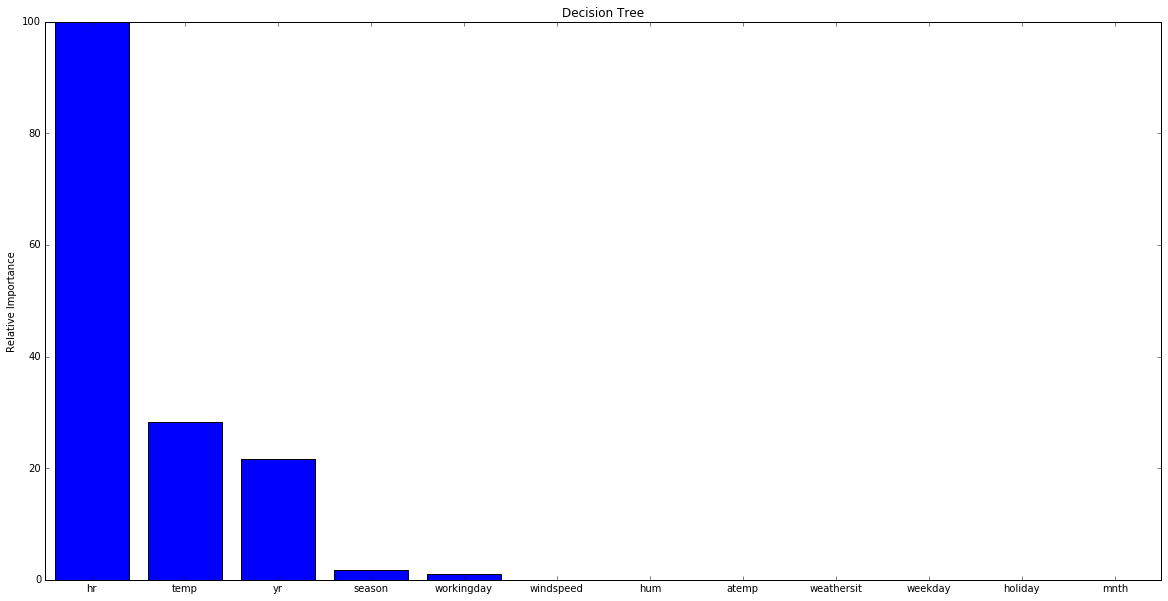

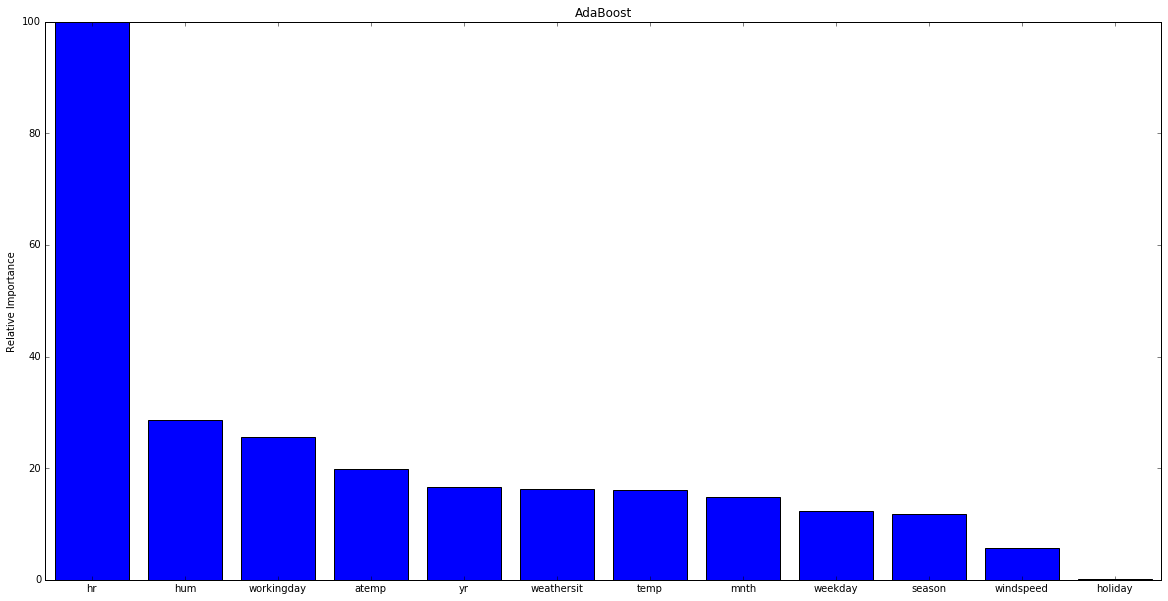

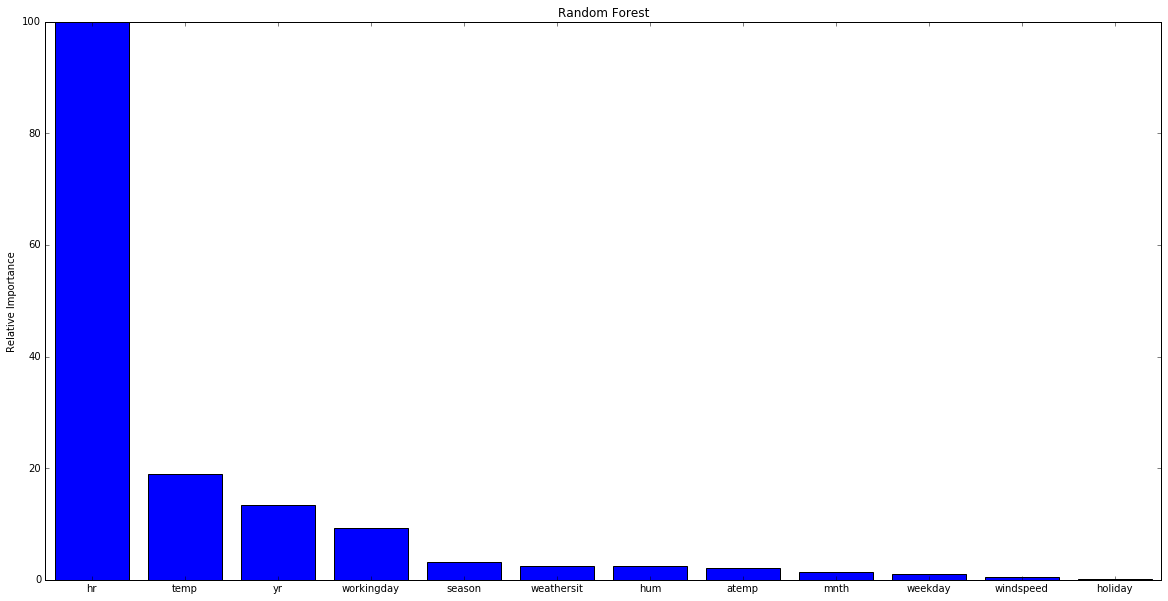

In [8]:
plot_feature_importances(dt_regressor.feature_importances_, "Decision Tree", feature_names)
plot_feature_importances(ab_regressor.feature_importances_, "AdaBoost", feature_names)
plot_feature_importances(rf_regressor.feature_importances_, "Random Forest", feature_names)